In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date 

In [18]:
df = pd.read_csv('phone_data.csv')
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
index           830 non-null int64
date            830 non-null object
duration        830 non-null float64
item            830 non-null object
month           830 non-null object
network         830 non-null object
network_type    830 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [21]:
df['cutday'] = df.date.apply(lambda x: x.split()[0])
df.head()

,index,date,duration,item,month,network,network_type,cutday
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,15/10/14
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,15/10/14
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,15/10/14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,15/10/14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,15/10/14


In [25]:
df['cutday'] = df.cutday.apply(pd.to_datetime)

In [26]:
df.head()

,index,date,duration,item,month,network,network_type,cutday
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,2014-10-15
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,2014-10-15
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2014-10-15
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,2014-10-15
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,2014-10-15


In [51]:
df2=df.groupby('cutday').agg({'duration':np.mean})
df2.head()

,duration
cutday,
2014-01-11,331.1430
2014-01-12,12.1430
2014-02-11,453.0715
2014-02-12,280.2145
2014-03-11,40.0390


In [63]:
df2=df.groupby('cutday').agg({'duration':np.mean})
df2['date'] = df2.index.values 
df2['d_day'] = df2.date-df2.date.min()
df2['d_day'] = df2.d_day.apply(lambda x: x.days)
df2.head()

,duration,date,d_day
cutday,,,
2014-01-11,331.1430,2014-01-11,0
2014-01-12,12.1430,2014-01-12,1
2014-02-11,453.0715,2014-02-11,31
2014-02-12,280.2145,2014-02-12,32
2014-03-11,40.0390,2014-03-11,59


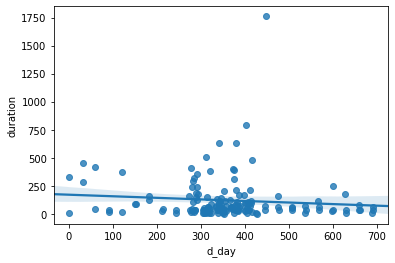

In [64]:
sns.regplot(x=df2.d_day, y=df2.duration)

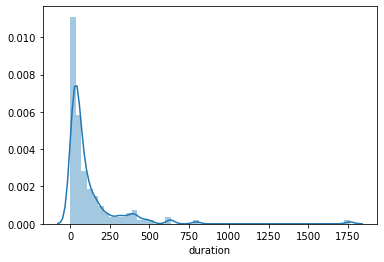

In [65]:
sns.distplot(df2.duration)

In [66]:
df.groupby('network').size()

network
Meteor        87
Tesco         84
Three        215
Vodafone     215
data         150
landline      42
special        3
voicemail     27
world          7
dtype: int64

In [67]:
df.groupby('item').duration.mean()

item
call    237.940722
data     34.429000
sms       1.000000
Name: duration, dtype: float64

In [70]:
df['hour'] = df.date.apply(lambda x: x.split()[1].split(':')[0])
df['hour'] = df.hour.apply(int)
df.head()

,index,date,duration,item,month,network,network_type,cutday,hour
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,2014-10-15,6
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,2014-10-15,6
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2014-10-15,14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,2014-10-15,14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,2014-10-15,17


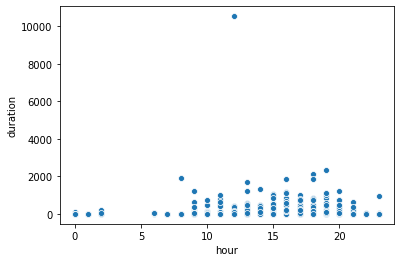

In [71]:
sns.scatterplot(df.hour, df.duration)

In [72]:
df.groupby('hour').duration.mean()

hour
0      23.600000
1       1.285714
2      56.600000
6      34.287086
7       3.285714
8     109.555556
9      95.947368
10     75.459459
11    102.953488
12    262.224490
13    151.480769
14     96.071429
15    224.513514
16    221.177778
17    135.350877
18    159.737705
19    196.042553
20    161.147059
21     52.800000
22      2.444444
23     54.947368
Name: duration, dtype: float64